<a href="https://colab.research.google.com/github/pearllpatell/is_4487_Patel/blob/main/lab4_social_media_eda_patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [8]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [9]:
import pandas as pd

df = pd.read_csv ('x_superbowl.csv')

print(df)

      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id        id_str  \
0     1.360000e+18  1.35863

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [15]:
numeric_columns_as_objects = df.select_dtypes(include='object').columns
for col in numeric_columns_as_objects:
    df[col] = pd.to_numeric(df[col], errors='ignore')

useful_df = df.dropna(axis=1, how='all')
useful_df = useful_df.loc[:, useful_df.nunique() > 1]

numeric_columns = useful_df.select_dtypes(include=['float64', 'int64']).columns
Q1 = useful_df[numeric_columns].quantile(0.25)
Q3 = useful_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

is_outlier_numeric = ((useful_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (useful_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_numeric_only = useful_df[~is_outlier_numeric]

original_size = df.shape
filtered_size_numeric_only = filtered_df_numeric_only.shape
print(f"Original size: {original_size}, Filtered size: {filtered_size_numeric_only}")

Original size: (9756, 41), Filtered size: (7138, 33)


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

In [ ]:
#chart 1

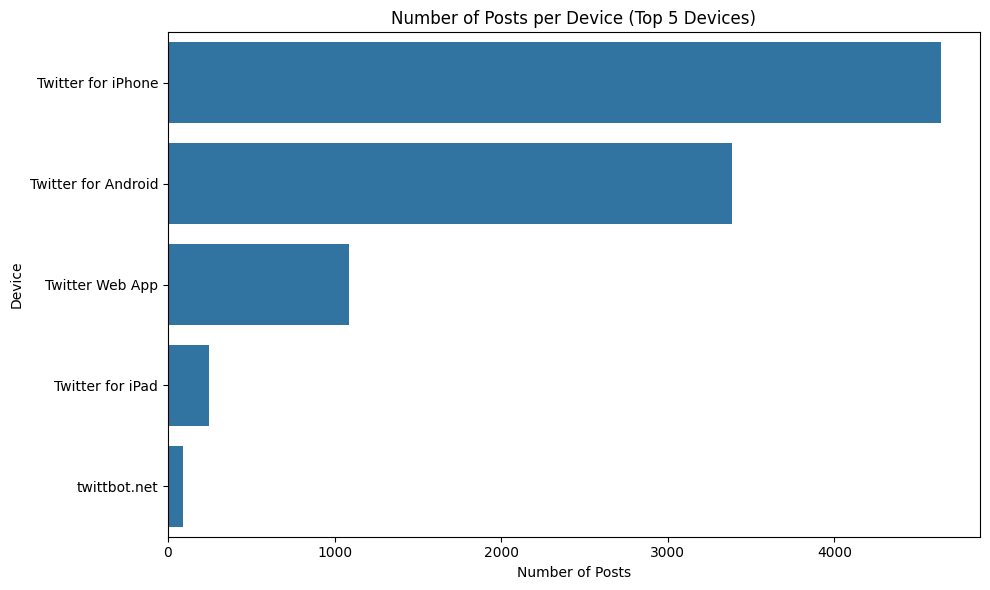

In [13]:
df['device'] = df['source'].str.extract('>(.*?)<')  # Extract device name between HTML tags

device_counts = df['device'].value_counts().nlargest(5).reset_index()
device_counts.columns = ['device', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='device', data=device_counts)
plt.title('Number of Posts per Device (Top 5 Devices)')
plt.xlabel('Number of Posts')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

In [6]:
#chart 2

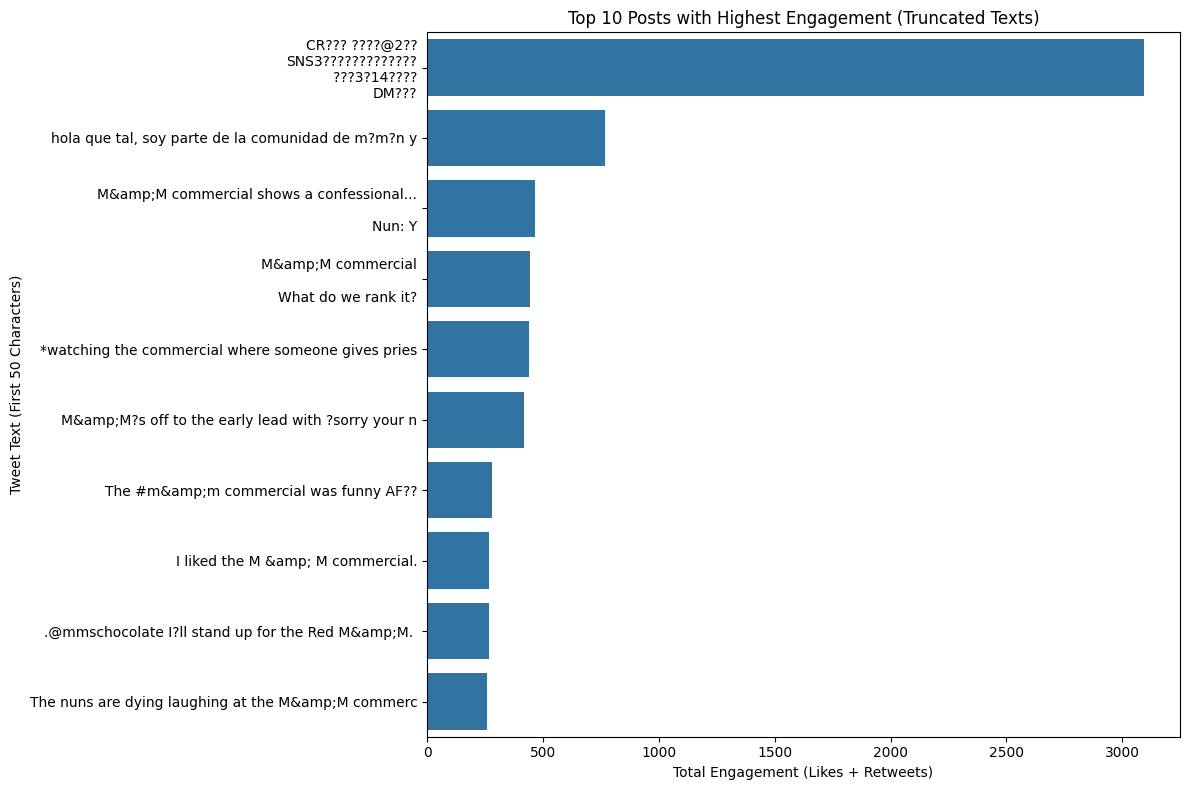

In [14]:
# Assuming 'favorite_count' and 'retweet_count' are columns in df for likes and retweets respectively
df['total_engagement'] = df['favorite_count'] + df['retweet_count']

# Sort the dataframe by total engagement and select the top 10
top_posts = df.sort_values(by='total_engagement', ascending=False).head(10)

# Truncate tweet texts to the first 50 characters for readability
top_posts['truncated_text'] = top_posts['text'].str.slice(0, 50)

# Plotting the top 10 posts with highest engagement using truncated tweet texts
plt.figure(figsize=(12, 8))
sns.barplot(x='total_engagement', y='truncated_text', data=top_posts, orient='h')
plt.title('Top 10 Posts with Highest Engagement (Truncated Texts)')
plt.xlabel('Total Engagement (Likes + Retweets)')
plt.ylabel('Tweet Text (First 50 Characters)')
plt.tight_layout()
plt.show()